# Week 4-6 Homework
### CS146 // Professor Scheffler
### Soren Gran // 10/20/18

# 1. Call center data set — exponential likelihood with gamma prior

In [81]:
%matplotlib inline
import pystan
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call-center.csv')

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# print(len(waiting_times_per_hour[11])) # in terms of eczema data example, this would be our 'num_trials'
# print(waiting_times_per_hour[11]) # waiting_times_per_hour[11] will give us our 'patients'

In [27]:
# Now we build our Stan data and prior hyperparameters
# prior hyperparameters
prior_alpha = 1
prior_beta = .25

waiting_times_data = {
    'prior_alpha': prior_alpha, # as the sample Stan code said, these are fixed prior hyperparameters
    'prior_beta': prior_beta, # for our gamma distribution
    'num_calls': 892,
    'wait_times': [0.0711, 0.125, 0.0121, 0.00513, 0.112, 0.0694, 0.0166, 0.163, 0.0481, 0.0762, 0.175, 0.117, 0.211, 0.0468, 0.0272, 0.134, 0.035, 0.0125, 0.0834, 0.011, 0.0226, 0.0652, 0.132, 0.0738, 0.206, 0.107, 0.0354, 0.0853, 0.0219, 0.106, 0.165, 0.0729, 0.111, 0.0352, 0.0749, 0.00188, 0.00146, 0.0113, 0.0175, 0.167, 0.0736, 0.00292, 0.0378, 0.116, 0.145, 0.161, 0.292, 0.0158, 0.207, 0.481, 0.066, 0.0926, 0.0188, 0.103, 0.262, 0.167, 0.163, 0.0357, 0.137, 0.0699, 0.00632, 0.012, 0.124, 0.159, 0.000179, 0.0441, 0.16, 0.196, 0.131, 0.0731, 0.0282, 0.046, 0.089, 0.0318, 0.0303, 0.0269, 0.184, 0.144, 0.0981, 0.277, 0.0277, 0.000416, 0.225, 0.0538, 0.0422, 0.186, 0.00116, 0.0118, 0.0668, 0.157, 0.12, 0.0285, 0.0204, 0.0702, 0.0692, 0.126, 0.00857, 0.0322, 0.029, 0.0737, 0.0811, 0.0172, 0.121, 0.0589, 0.00973, 0.0797, 0.0996, 0.0862, 0.185, 0.0671, 0.0142, 0.0669, 0.0739, 0.12, 0.566, 0.0179, 0.0483, 0.0382, 0.0109, 0.058, 0.0252, 0.0368, 0.0241, 0.156, 0.0696, 0.015, 0.0759, 0.0431, 0.0798, 0.0816, 0.108, 0.0155, 0.0211, 0.00171, 0.00148, 0.0117, 0.0164, 0.0681, 0.000238, 0.00691, 0.127, 0.0502, 0.00598, 0.0722, 0.0174, 0.0627, 0.00372, 0.0648, 0.0343, 0.101, 0.0751, 0.0111, 0.189, 0.0298, 0.0563, 0.0123, 0.00126, 0.0407, 0.0203, 0.143, 0.0488, 0.0696, 0.0145, 0.0474, 0.0245, 0.172, 0.17, 0.109, 0.182, 0.0357, 0.0729, 0.295, 0.041, 0.207, 0.0725, 0.107, 0.00257, 0.0252, 0.0866, 0.00576, 0.0468, 0.13, 0.0881, 0.115, 0.0321, 0.000605, 0.0392, 0.017, 0.0408, 0.00253, 0.132, 0.298, 0.109, 0.00814, 0.0338, 0.0253, 0.0153, 0.0475, 0.0624, 0.199, 0.265, 0.0202, 0.199, 0.135, 0.0285, 0.0728, 0.124, 0.0165, 0.0385, 0.0843, 0.0988, 0.139, 0.0311, 0.0837, 0.0931, 0.182, 0.0129, 0.00582, 0.0166, 0.109, 0.039, 0.0892, 0.0269, 0.0407, 0.154, 0.109, 0.212, 0.112, 0.0252, 0.00368, 0.0556, 0.103, 0.0754, 0.0135, 0.106, 0.184, 0.0462, 0.0152, 0.0438, 0.105, 0.0283, 0.0417, 0.229, 0.103, 0.0628, 0.0499, 0.122, 0.0227, 0.0451, 0.164, 0.121, 0.0665, 0.00797, 0.113, 0.0421, 0.166, 0.062, 0.129, 0.0966, 0.0167, 0.211, 0.0155, 0.129, 0.0595, 0.0219, 0.105, 0.0483, 0.0959, 0.064, 0.00275, 0.166, 0.0134, 0.0549, 0.235, 0.06, 0.000117, 0.00322, 0.0557, 0.0555, 0.169, 0.211, 0.0521, 0.0485, 0.0173, 0.0644, 0.109, 0.043, 0.0111, 0.215, 0.114, 0.0552, 0.00457, 0.219, 0.314, 0.049, 0.0113, 0.0513, 0.151, 0.00505, 0.0232, 0.0637, 0.0347, 0.0247, 0.000251, 0.0439, 0.00442, 0.124, 0.115, 0.0601, 0.209, 0.422, 0.0646, 0.00895, 0.047, 0.125, 0.0196, 0.187, 0.0125, 0.00415, 0.0394, 0.035, 0.046, 0.0236, 0.0551, 0.152, 0.0371, 0.00205, 0.0499, 0.0565, 0.0341, 0.0509, 0.0589, 0.0456, 0.0365, 0.00266, 0.0681, 0.0565, 0.0045, 0.0144, 0.0601, 0.0303, 0.0349, 0.0441, 0.0328, 0.0733, 0.0488, 0.0717, 0.269, 0.0997, 0.0157, 0.00706, 0.0426, 0.149, 0.0473, 0.0846, 0.0519, 0.0223, 0.0848, 0.0145, 0.00368, 5.87e-05, 0.0163, 0.0841, 0.171, 0.0538, 0.0445, 0.147, 0.0236, 0.115, 0.193, 0.00451, 0.014, 0.0687, 0.00123, 0.13, 0.0513, 0.0662, 0.15, 0.133, 0.0459, 0.0777, 0.0442, 0.106, 0.0114, 0.00198, 0.00188, 0.105, 0.155, 0.098, 0.0762, 0.12, 0.00772, 0.0203, 0.0309, 0.0198, 0.0654, 0.106, 0.0853, 0.000944, 0.000954, 0.109, 0.0293, 0.0693, 0.0262, 0.0767, 0.307, 0.0163, 0.0962, 0.0224, 0.00329, 0.00259, 0.0164, 0.0481, 0.194, 0.00661, 0.111, 0.00302, 0.154, 0.00364, 0.0176, 0.0554, 0.0916, 0.0313, 0.0198, 0.121, 0.145, 0.0539, 0.101, 0.127, 0.0408, 0.0882, 0.0538, 0.0717, 0.104, 0.113, 0.00819, 0.146, 0.000258, 0.0787, 0.115, 0.0136, 0.0367, 0.0852, 0.0565, 0.0666, 0.105, 0.0834, 0.0789, 0.0496, 0.0952, 0.0742, 0.0143, 0.0627, 0.0164, 0.079, 0.021, 0.0803, 0.000524, 0.0245, 0.0097, 0.0599, 0.0469, 0.0176, 0.0708, 0.0731, 0.0614, 0.085, 0.0221, 0.191, 0.00177, 0.0272, 0.0567, 0.0255, 0.00566, 0.122, 0.15, 0.0715, 0.0338, 0.0193, 0.00552, 0.0457, 0.208, 0.174, 0.0026, 0.0656, 0.0742, 0.022, 0.0382, 0.172, 0.0209, 0.04, 0.117, 0.0217, 0.000618, 0.0459, 0.00841, 0.0104, 0.0509, 0.104, 0.000327, 0.0042, 0.0902, 0.0341, 0.091, 0.0569, 0.027, 0.184, 0.0343, 0.19, 0.00992, 0.111, 0.225, 0.0608, 0.0927, 0.0617, 0.0808, 0.00346, 0.161, 0.055, 0.105, 0.506, 0.0304, 0.0163, 0.0973, 0.000753, 0.0564, 0.0032, 0.00947, 0.0337, 0.0905, 0.0918, 0.0315, 0.0155, 0.0425, 0.00194, 0.00797, 0.103, 0.000849, 0.00948, 0.0641, 0.0765, 0.0982, 0.00755, 0.0969, 0.0585, 0.102, 0.012, 0.0807, 0.181, 0.255, 0.0239, 0.00207, 0.00591, 0.0988, 0.0383, 0.204, 0.0168, 0.0487, 0.0326, 0.0457, 0.0212, 0.0192, 0.185, 0.0876, 0.00121, 0.0229, 0.023, 0.0986, 0.0831, 0.0192, 0.142, 0.00611, 0.0369, 0.0496, 0.0523, 0.0471, 0.0315, 0.0202, 0.0342, 0.00263, 0.307, 0.0354, 0.0234, 0.133, 0.124, 0.0744, 0.114, 0.102, 0.0694, 0.0626, 0.0245, 0.00579, 0.124, 0.171, 0.212, 0.0113, 0.00475, 0.00489, 0.0727, 0.0388, 0.0584, 0.207, 0.0665, 0.143, 0.0714, 0.192, 0.197, 0.053, 0.0309, 0.0151, 0.0495, 0.0143, 0.0837, 0.138, 0.00898, 0.195, 0.0225, 0.0251, 0.0159, 0.121, 0.0887, 0.0277, 0.0282, 0.162, 0.018, 0.28, 0.00839, 0.0286, 0.0063, 0.0313, 0.021, 0.0609, 0.00187, 0.00668, 0.0366, 0.0598, 0.0707, 0.174, 0.109, 0.0608, 0.0313, 0.109, 0.0132, 0.087, 0.00677, 0.018, 0.044, 0.017, 0.158, 0.0442, 0.114, 0.0673, 0.0326, 0.031, 0.0724, 0.14, 0.0186, 0.00151, 0.0302, 0.0386, 0.201, 0.00411, 0.00878, 0.0313, 0.000188, 0.0748, 0.0779, 0.00582, 0.07, 0.0113, 0.00965, 0.151, 0.0443, 0.011, 0.0381, 0.00801, 0.0203, 0.164, 0.0242, 0.0217, 0.0261, 0.0627, 0.000245, 0.0106, 0.00567, 0.0736, 0.02, 0.0391, 0.0105, 0.0925, 0.00756, 0.0102, 0.013, 0.00146, 0.088, 0.0247, 0.063, 0.00596, 0.0107, 0.0358, 0.013, 0.0117, 0.0256, 0.0265, 0.368, 0.00302, 0.00357, 0.0419, 0.0245, 0.0563, 0.109, 0.0796, 0.109, 0.0567, 0.0207, 0.00938, 0.256, 0.0557, 0.113, 0.011, 0.00809, 0.0214, 0.00244, 0.0161, 0.0297, 0.128, 0.0223, 0.0113, 0.0275, 0.0196, 0.0121, 0.0773, 0.0428, 0.0674, 0.0116, 0.0186, 0.129, 0.146, 0.0766, 0.000269, 0.0149, 0.0493, 0.00883, 0.00656, 0.00548, 0.0193, 0.00948, 0.0633, 0.0361, 0.0742, 0.0427, 0.0274, 0.0539, 0.027, 0.0145, 0.0388, 0.0271, 0.0036, 0.0812, 0.0378, 0.0195, 0.0164, 0.0615, 0.101, 0.0605, 0.0494, 0.0609, 0.0538, 0.0205, 0.0187, 0.0147, 0.00858, 0.0905, 0.196, 0.0792, 0.0445, 0.0575, 0.0126, 0.173, 0.0379, 0.104, 0.0854, 0.0465, 0.145, 0.00447, 0.0506, 0.0499, 0.0213, 0.0521, 0.0466, 0.0131, 0.0197, 0.0454, 0.00161, 0.0168, 0.00849, 0.0663, 0.0081, 0.00594, 0.0428, 0.0157, 0.102, 0.0309, 0.0543, 0.0236, 0.0154, 0.0214, 0.106, 0.00881, 0.226, 0.0497, 0.0386, 0.0864, 0.0155, 0.139, 0.116, 0.0409, 0.0534, 0.0877, 0.022, 0.0179, 0.0112, 0.0302, 0.0123, 0.11, 7.21e-06, 0.111, 0.0548, 0.127, 0.00477, 0.13, 0.00288, 0.0602, 0.147, 0.0207, 0.132, 0.00212, 0.0246, 0.0776, 0.0598, 0.114, 0.0272, 0.0079, 0.0285, 0.0111, 0.103, 0.296, 0.0313, 0.0384, 0.00446, 0.0657, 0.0114, 0.342, 0.0434, 0.0266, 0.109, 0.00581, 0.0155, 0.0322, 0.046, 0.0816, 0.056, 0.0124, 0.0329, 0.126, 0.0381, 0.0393, 0.0154, 0.00345, 0.00226, 0.114, 0.0881, 0.00316, 0.0388, 0.111, 0.0139, 0.0205, 0.0119, 0.0705, 0.0219, 0.0765, 0.0729, 0.0485, 0.00661, 0.169, 0.00679, 0.0538, 0.00537, 0.01, 0.047, 0.0325, 0.0668]}
# instead of using len(waiting_times_per_hour[11]) and waiting_times_per_hour[11], I pasted in their values to avoid dependencies in the code

We are using an exponential distribution to model our waiting time data. This is because exponential distributions model the times between events, which are continuous. The parameter of an exponential parameter is $\lambda$, and the conjugate prior is a gamma distribution, which has hyperparameters $\alpha$ and $\beta$ (stated above). $\lambda$ represents the average rate of events (phone calls).

In [36]:
# Now we build our Stan code
stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  
    int<lower=0> num_calls;  // number of calls in the eleventh hour
    real<lower=0> wait_times[num_calls];  // every wait time in the eleventh hour
    real<lower=0> prior_alpha;  // fixed prior hyperparameter
    real<lower=0> prior_beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> lam;  // lambda, the average rate of events - the
                              // parameter of the exponential distribution
}

// The model block contains all probability distributions in the model.
// Think of this as specifying the generative model for the scenario.
model {
    lam ~ gamma(prior_alpha, prior_beta);  // prior over lambda
    wait_times ~ exponential(lam); // likelihood function for wait times
}


"""
# I set the lower limit of number of calls to 0, because it is possible for there to be no calls in an hour

In [37]:
stan_model = pystan.StanModel(model_code=stan_code)

# Fit the model to the data. This will generate samples from the posterior over
# all parameters of the model. We start by computing posteriors for the treatment
# data.

stan_results = stan_model.sampling(data=waiting_times_data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9224517b9df6a2448ff8d050faeb386d NOW.
/Users/sorengran/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [38]:
# Print out the mean, standard deviation and quantiles of all parameters.
# These are approximate values derived from the samples generated by Stan.
# You can ignore the "lp__" row for now. Pay attention to the row for
# the "p" parameter of the model.
#
# The columns in the summary are
#
#  * mean: The expected value of the posterior over the parameter
#  * se_mean: The estimated error in the posterior mean
#  * sd: The standard deviation of the posterior over the parameter
#  * 2.5%, etc.: Percentiles of the posterior over the parameter
#  * n_eff: The effective number of samples generated by Stan. The
#           larger this value, the better.
#  * Rhat: An estimate of the quality of the samples. This should be
#          close to 1.0, otherwise there might be a problem with the
#          convergence of the sampler.

print(stan_results)

# Specify which parameters you want to see in the summary table using
# the "pars" keyword argument. Specify which percentiles you want to
# see using the "probs" keyword argument.
#
# The statement below shows only the 2.5, 50, 97.5 percentiles for the
# parameter p.

print(stan_results.stansummary(pars=['lam'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_9224517b9df6a2448ff8d050faeb386d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lam   14.84    0.01    0.5  13.87  14.49  14.84  15.18  15.82   1477    1.0
lp__ 1516.4    0.02   0.68 1514.4 1516.2 1516.6 1516.8 1516.9   1773    1.0

Samples were drawn using NUTS at Sat Oct 20 14:38:19 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Inference for Stan model: anon_model_9224517b9df6a2448ff8d050faeb386d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
lam  14.84    0.01    0.5  13.87  14.84  15.82   1477    1.0

Samples were drawn using NUTS at Sat Oct 20 14:3

## Results:

$\lambda$ confidence interval from Stan: [13.87, 15.82]
<br /> $\lambda$ mean from Stan: 14.84

$\lambda$ confidence interval from preclass work: [13.9, 15.9]
<br /> $\lambda$ mean from preclass work: 14.9

Very close! Basically the same, with rounding.

Posterior 95% confidence interval for lambda: [13.8689536  15.81544257]


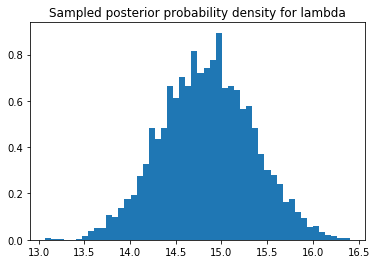

In [42]:
posterior_samples = stan_results.extract()
plt.hist(posterior_samples['lam'], bins=50, density=True)
plt.title('Sampled posterior probability density for lambda')
print(
    "Posterior 95% confidence interval for lambda:",
    np.percentile(posterior_samples['lam'], [2.5, 97.5]))
plt.show()

# 2. Normal likelihood with normal-inverse-gamma prior


In [66]:
my_data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
# We have normal data with unknown mean and variance
# Therefore, our conjugate prior is the normal-inverse-gamma

n = len(my_data) # sample length

# The following 4 lines were taken from our class's code
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4

norm_data = {
    'n': n,
    'my_data': my_data,
    'mu_prior': mu_0,
    'nu_prior': nu_0,
    'alpha_prior': alpha_0,
    'beta_prior': beta_0}

In [67]:
# Now we build our Stan code
stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {  
    int<lower=0> n;
    real my_data[n];
    real<lower=0> mu_prior;  // fixed prior hyperparameter
    real<lower=0> nu_prior;   // fixed prior hyperparameter
    real<lower=0> alpha_prior;   // fixed prior hyperparameter
    real<lower=0> beta_prior;    // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real mu_mean;
    real<lower=0> sigma2; // parameters of a normal distribution
}

// The model block contains all probability distributions in the model.
// Think of this as specifying the generative model for the scenario.
model {
    mu_mean ~ normal(mu_prior, sqrt(sigma2/nu_prior));
    sigma2 ~ inv_gamma(alpha_prior, beta_prior);
    my_data ~ normal(mu_mean, sqrt(sigma2)); // normal likelihood function
    
}


"""

In [68]:
stan_model = pystan.StanModel(model_code=stan_code)

# Fit the model to the data. This will generate samples from the posterior over
# all parameters of the model. We start by computing posteriors for the treatment
# data.

stan_results1 = stan_model.sampling(data=norm_data)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_306aa7ee70d019d15e0532fe5949dce6 NOW.
/Users/sorengran/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [74]:
print(stan_results1)

print(stan_results1.stansummary(pars=['mu_mean', 'sigma2'], probs=[0.025, 0.5, 0.975]))

Inference for Stan model: anon_model_306aa7ee70d019d15e0532fe5949dce6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_mean   3.06  2.5e-3   0.13    2.8   2.98   3.06   3.15   3.33   2927    1.0
sigma2    3.62  7.1e-3   0.36   2.99   3.36    3.6   3.86   4.39   2646    1.0
lp__    -233.2    0.02   1.01 -235.9 -233.5 -232.8 -232.5 -232.2   1808    1.0

Samples were drawn using NUTS at Sat Oct 20 21:29:05 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Inference for Stan model: anon_model_306aa7ee70d019d15e0532fe5949dce6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mu_mean   3.06  2.

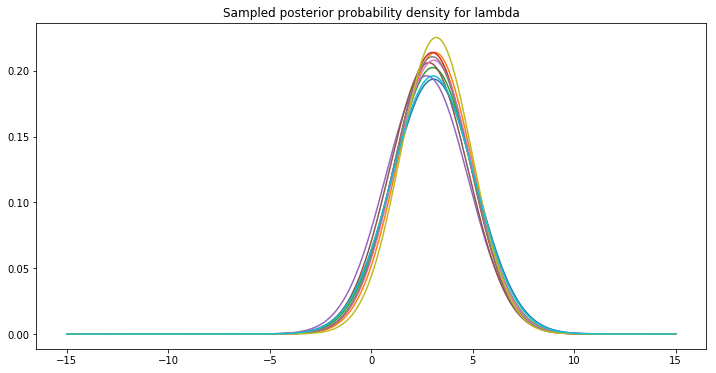

In [83]:
posterior_samples = stan_results1.extract()
means = posterior_samples['mu_mean']
sigma2s = posterior_samples['sigma2']
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(10):
    plot_y = stats.norm.pdf(plot_x, loc=means[i], scale=np.sqrt(sigma2s[i]))
    plt.plot(plot_x, plot_y)
plt.title('Sampled posterior probability density for lambda')
plt.show()

# 3. Log-normal HRTEM data

In [88]:
new_data = np.loadtxt('/Users/sorengran/Documents/hrtem.csv')
log_data = np.log(new_data)
n = len(log_data)
# next 4 value taken from class code
mu_0 = 2.3
nu_0 = 0.1
alpha_0 = 2
beta_0 = 5
# Same data arguments as last time. That way, we can reuse our model (saving us compiling time)
log_stan_data = {
    'n': n,
    'my_data': log_data,
    'mu_prior': mu_0,
    'nu_prior': nu_0,
    'alpha_prior': alpha_0,
    'beta_prior': beta_0}

stan_results2 = stan_model.sampling(data=log_stan_data)

print(stan_results2)
print(stan_results2.stansummary(pars=['mu_mean', 'sigma2'], probs=[0.025, 0.5, 0.975]))

/Users/sorengran/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Inference for Stan model: anon_model_306aa7ee70d019d15e0532fe5949dce6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_mean   1.89  5.4e-4   0.03   1.83   1.87   1.89   1.91   1.95   3271    1.0
sigma2     0.5  4.8e-4   0.03   0.44   0.47    0.5   0.52   0.56   4000    1.0
lp__    -75.98    0.02   0.96 -78.56 -76.34 -75.69  -75.3 -75.05   2077    1.0

Samples were drawn using NUTS at Sat Oct 20 22:39:57 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Inference for Stan model: anon_model_306aa7ee70d019d15e0532fe5949dce6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    50%  97.5%  n_eff   Rhat
mu_mean   1.89  5.

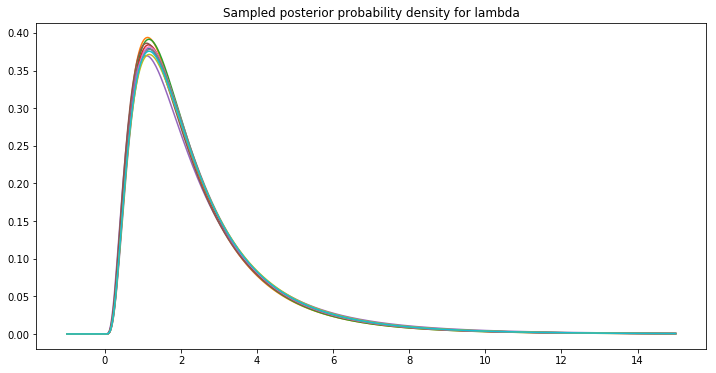

In [95]:
posterior_samples = stan_results2.extract()
means = posterior_samples['mu_mean']
sigma2s = posterior_samples['sigma2']
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-1, 15, 500)
for i in range(10):
    plot_y = stats.lognorm.pdf(plot_x, np.sqrt(sigma2s[i]), scale=means[i]) # we need to use lognorm because we are 
    # working with logged data. Otherwise, we're pretty much doing the same thing as last exercise
    plt.plot(plot_x, plot_y)
plt.title('Sampled posterior probability density for lambda')
plt.show()